In [ ]:
import pandas as pd

# Cargado de CSV y extracción de datos de Venezuela y Alemania.
df = pd.read_csv("../inflacion global/Global Dataset of Inflation.csv", sep=",", encoding="ISO-8859-1")
df.head()

df_DEU = df[(df["Country"] == "Germany") & (df["Indicator Type"] == "Inflation")]
df_DEU.head()

df_VEN = df[(df["Country Code"] == "VEN") & (df["Indicator Type"] == "Inflation")]
df_VEN.head()

In [ ]:
# Unión de la información relevante para el análisis. 
concatenado = pd.concat([df_VEN, df_DEU])
concatenado.head(2)

In [ ]:
# Busqueda de duplicados.
print(f"Duplicados:\n{concatenado.duplicated().sum()}\nValores NaN:\n{concatenado.isna().sum()}")

In [ ]:

# Borrado de columnas sin datos relevantes.
concatenado.drop(columns=["Unnamed: 59","Unnamed: 60", "Unnamed: 61", "Unnamed: 62", "Unnamed: 63"], inplace=True)
print(f"Duplicados:\n{concatenado.duplicated().sum()}\nValores NaN:\n{concatenado.isna().sum()}")

In [ ]:
#  Borrados de valores nulos y duplicados.
concatenado.dropna(inplace=True)
print(f"Duplicados:\n{concatenado.duplicated().sum()}\nValores NaN:\n{concatenado.isna().sum()}")

In [ ]:
# Selecion de la inflación general.
inflacion_general_ven = concatenado[(concatenado["Series Name"] == "Headline Consumer Price Inflation") & (concatenado["Country Code"] == "VEN")]
# Selección de columnas numéricas.
colum_num_ = inflacion_general_ven.loc[:, "1970":"2022"]
# Obtener las colunas deseadas con transponer y resetear índice.
resultado_ = colum_num_.T.reset_index()
# Nombrar las columnas.
resultado_.columns = ["Year", "Headline Consumer Price Inflation"]
# Asegurar que sean datos numéricos.
resultado_["Year"] = pd.to_numeric(resultado_["Year"], errors="coerce")
resultado_["Headline Consumer Price Inflation"] = pd.to_numeric(resultado_["Headline Consumer Price Inflation"], errors="coerce")
#resultado_["Country"] = "Venezuela"
resultado_.head()

In [8]:
# Crear Modelo estadistico de los daros de Venezuela.
import statsmodels.api as sm

x = resultado_["Year"]
y = resultado_["Headline Consumer Price Inflation"]

x = sm.add_constant(x)

model_deu = sm.OLS(y, x).fit()
model_deu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Headline Consumer Price Inflation   R-squared:                       0.072
Model:                                           OLS   Adj. R-squared:                  0.054
Method:                                Least Squares   F-statistic:                     3.982
Date:                               Fri, 20 Jun 2025   Prob (F-statistic):             0.0513
Time:                                       10:17:39   Log-Likelihood:                -557.15
No. Observations:                                 53   AIC:                             1118.
Df Residuals:                                     51   BIC:                             1122.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.226e+05   1.63e+05     -1.985      0.053   -6.49e+05    3682.650
Year         162.4881     81.423      1.996      0.051      -0.976     325.952
==============================================================================
Omnibus:                      104.531   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3230.129
Skew:                           5.859   Prob(JB):                         0.00
Kurtosis:                      39.406   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Selección de la inflación general.
inflacion_general_deu = concatenado[(concatenado["Series Name"] == "Headline Consumer Price Inflation") & (concatenado["Country Code"] == "DEU")]
# Seleción de columnas numéricas.
colum_num = inflacion_general_deu.loc[:, "1970":"2022"]
# Obtener las colunas deseadas con transponer y resetear índice.
resultado = colum_num.T.reset_index()
# Nombrar Columnas.
resultado.columns = ["Year", "Headline Consumer Price Inflation"]
# Ajustar los tipos de datos para cada columna.
resultado["Year"] = pd.to_numeric(resultado["Year"], errors="coerce")
resultado["Headline Consumer Price Inflation"] = pd.to_numeric(resultado["Headline Consumer Price Inflation"], errors="coerce")
#resultado["Country"] = "Alemania"
resultado.head()

In [10]:
# Crear Modelo estadistico de los daros de Venezuela.
import statsmodels.api as sm

x = resultado["Year"]
y = resultado["Headline Consumer Price Inflation"]

x = sm.add_constant(x)

model_deu = sm.OLS(y, x).fit()
model_deu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Headline Consumer Price Inflation   R-squared:                       0.282
Model:                                           OLS   Adj. R-squared:                  0.268
Method:                                Least Squares   F-statistic:                     20.00
Date:                               Fri, 20 Jun 2025   Prob (F-statistic):           4.35e-05
Time:                                       10:17:39   Log-Likelihood:                -101.95
No. Observations:                                 53   AIC:                             207.9
Df Residuals:                                     51   BIC:                             211.8
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.0442     30.264      4.561      0.000      77.287     198.801
Year          -0.0678      0.015     -4.472      0.000      -0.098      -0.037
==============================================================================
Omnibus:                       24.731   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.084
Skew:                           1.329   Prob(JB):                     1.80e-12
Kurtosis:                       7.175   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

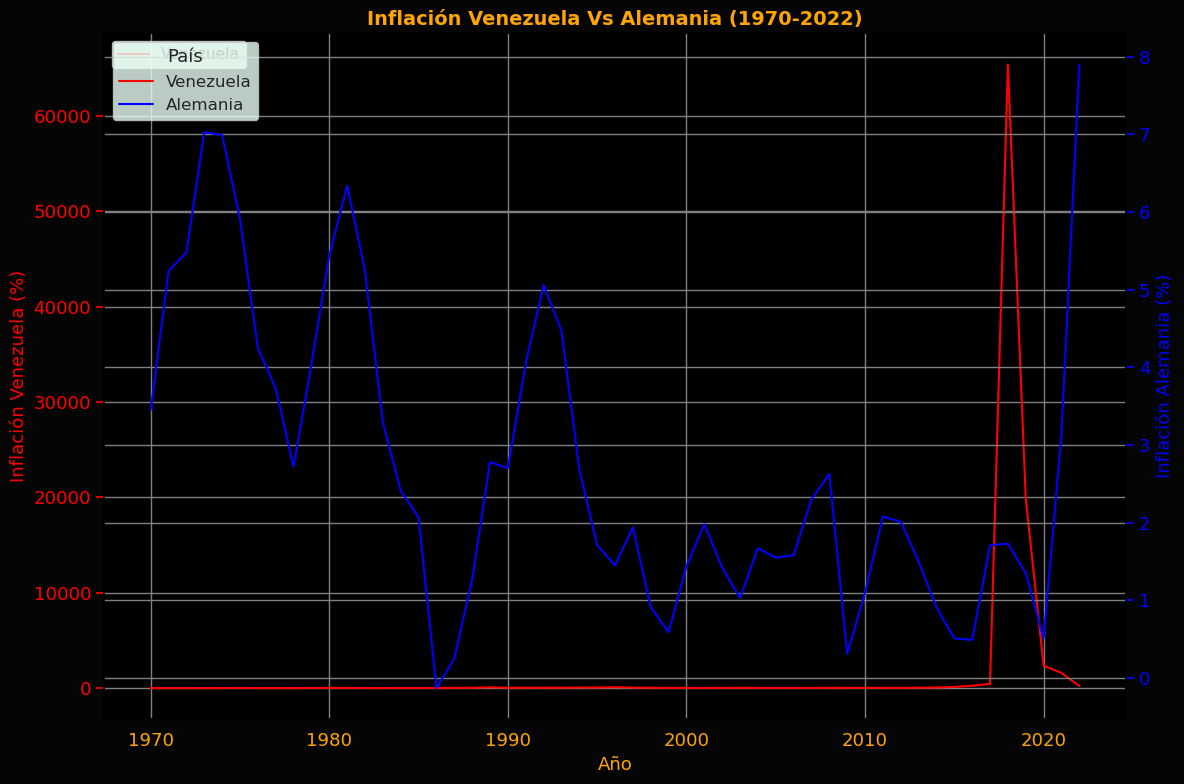

In [12]:
#  Crear gráfico de comparación.
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje principal.
fig, ax1 = plt.subplots(figsize=(12,8))

# Se crea el segundo eje.
ax2 = ax1.twinx()

# Crear El gráfico para Venezuela.
sns.lineplot(data=resultado_,  x="Year", y="Headline Consumer Price Inflation", ax=ax1, color="red", label="Venezuela")

# Crear el gráfico para Alemania.
sns.lineplot(data=resultado, x="Year", y="Headline Consumer Price Inflation", ax=ax2, color="blue", label="Alemania")

# Aplicación de estétita.
ax1.set_ylabel("Inflación Venezuela (%)", color="red", fontsize=13)
ax2.set_ylabel("Inflación Alemania (%)", color="blue", fontsize=13)
ax1.set_xlabel("Año", fontsize=13, color="orange")
plt.title("Inflación Venezuela Vs Alemania (1970-2022)", fontsize=14, color="orange", weight="bold")

# Agregar leyendas de forma manual debido a los ejes ax gemelos y dar un estilo.
line_1, label_1 = ax1.get_legend_handles_labels()
line_2, label_2 = ax2.get_legend_handles_labels()
plt.legend(line_1 + line_2, label_1 + label_2, loc="upper left", title="País", fontsize=12, title_fontsize=13)

# Dar estilos de colores al fondo.
ax1.set_facecolor("black")
ax2.set_facecolor("black")

# Dar estilos para los ejes "x" y "y".
ax1.tick_params(axis="x", labelsize=13, colors="orange")
ax1.tick_params(axis="y", labelsize=13, colors="red")
ax2.tick_params(axis="y", labelsize=13, colors="blue")

# Cambiar el tema de sns.
sns.set_theme(style="darkgrid", rc={
        "axes.facecolor": "#eafff5",
        "figure.facecolor": "#050505",
        "axes.edgecolor": "black",
        "grid.color": "gray"
    })

plt.grid(True)
plt.tight_layout()
